In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
image=mpimg.imread('test.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [3]:
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

In [8]:
# origin is at upper left
#this is the region i would like to retain
#or the vertices of the triangle i would like to retain
left_bottom=[0,540]
right_bottom=[900, 300]
apex=[400,0]

In [9]:
#y=mx+c
#to return the values of m and c that will be of best fit given x and y
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [10]:
#get the region inside the line
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
region_select[region_thresholds] = [255, 0, 0]


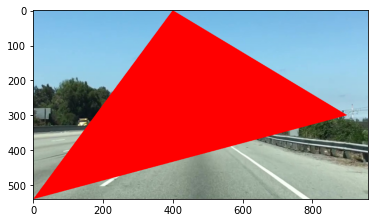

In [11]:
# Display the image
plt.imshow(region_select)

# uncomment if plot does not display
# plt.show()